# Loader demos
Demos the loader functions and some related utility

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import copy
import igraph as ig

In [2]:
import os
os.chdir('../')

In [3]:
from roc_bike_growth.loader import POI_graph_from_polygon, bike_infra_from_polygon, carall_from_polygon
rochester = ox.geocode_to_gdf('rochester, ny').geometry[0]
POIs = POI_graph_from_polygon(rochester)

C:\Users\hoang\miniconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


No OSM data for bike_designatedpath
No OSM data for bike_cyclewayrighttrack
No OSM data for bike_cyclewaylefttrack
No OSM data for bike_cyclestreet
No OSM data for bike_bicycleroad
No OSM data for bike_livingstreet


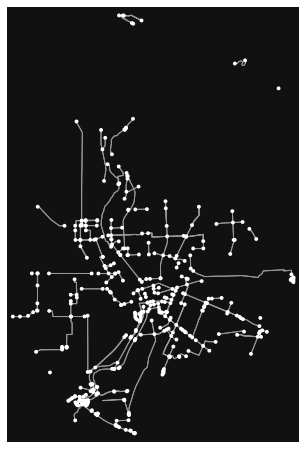

In [4]:
bike_infra = bike_infra_from_polygon(rochester)
fig, ax = ox.plot.plot_graph(bike_infra)

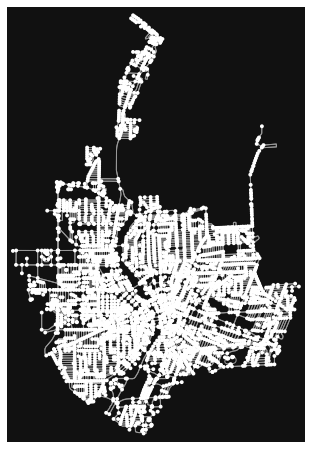

In [5]:
carall = carall_from_polygon(rochester, add_pois=True)
fig, ax = ox.plot.plot_graph(carall)

In [6]:
# Get list of POIs
pois = nx.get_node_attributes(carall, 'poi').keys()

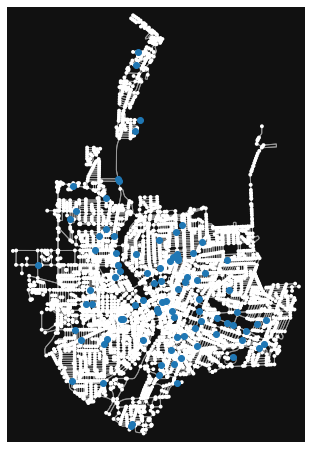

In [7]:
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

In [11]:
#combining the carall graph with the bike infrastructure node wise
#add nodes: 
car_copy = copy.deepcopy(carall)
c = set(car_copy.nodes())
b = bike_infra.nodes()

for node in b:
    if node not in c:
        car_copy.add_node(node)
        car_copy.nodes[node].update(bike_infra.nodes[node])


In [9]:
#combining carall graph with bike infrastructure edge wise
for bike_edge in bike_infra.edges:
    if bike_edge not in car_copy.edges:
        edge_1 = bike_edge[0]
        edge_2 = bike_edge[1]
        
        car_copy.add_edge(edge_1,edge_2)
        edge_a = {bike_edge: bike_infra[edge_1][edge_2][bike_edge[2]]}
        nx.set_edge_attributes(car_copy,edge_a)

In [ ]:
carall_ig = ig.Graph.from_networkx(car_copy)
pois_ids = [v_index for v_index,vertex in enumerate(carall_ig.vs) if vertex['poi']]
# pois_ids

In [11]:
for edge in carall_ig.es:
    edge['weight'] = edge['length']
for i,v in enumerate(carall_ig.vs):
    v['id'] = i

In [12]:
import roc_bike_growth.paper_gt
from roc_bike_growth.paper_gt import gt_from_scratch

In [13]:
roc_graph = gt_from_scratch(carall_ig, pois_ids, prune_factor = 0.1)

d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:22: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


In [14]:
rg_nx = ig.Graph.to_networkx(roc_graph)

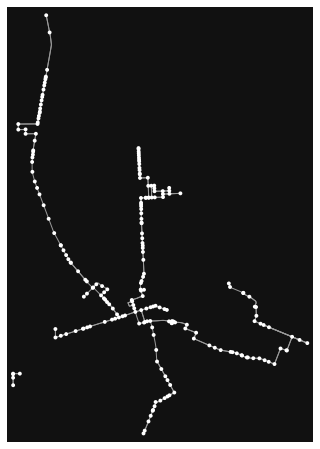

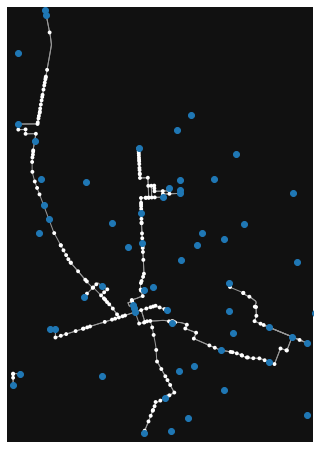

In [15]:
fig, ax = ox.plot.plot_graph(rg_nx)
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

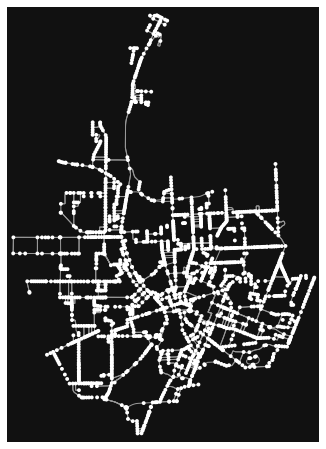

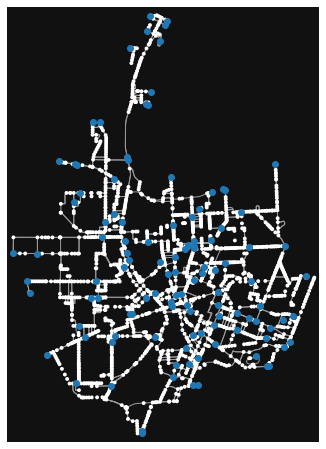

In [15]:
fig, ax = ox.plot.plot_graph(rg_nx)
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

<AxesSubplot:>

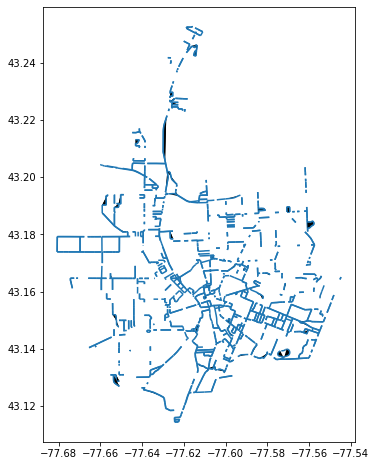

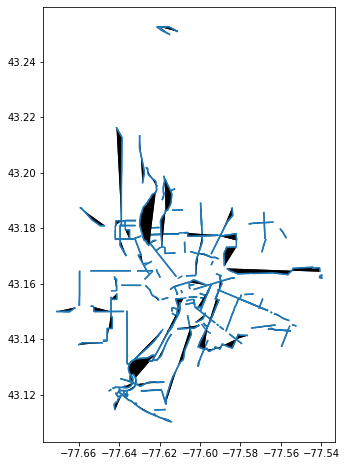

In [24]:
nodes, edges = ox.graph_to_gdfs(rg_nx)

# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
edges.plot(ax=ax, facecolor='black')

nodes, edges = ox.graph_to_gdfs(bike_infra)
fig, ax = plt.subplots(figsize=(12,8))
edges.plot(ax=ax, facecolor='black')


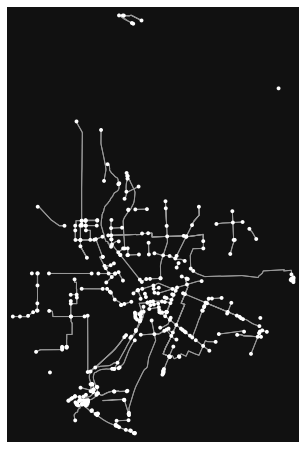

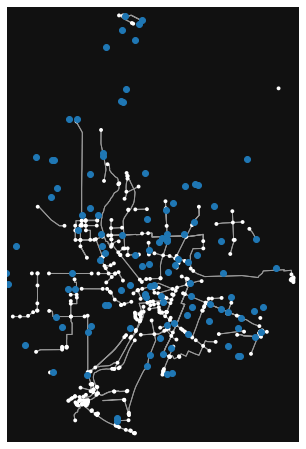

In [25]:

fig,ax = ox.plot.plot_graph(bike_infra)

x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

In [26]:
from roc_bike_growth.paper_gt import route_node_pairs